In [1]:
import os 
import scvelo as scv
import scanpy as sc

In [2]:
%cd "/Users/iwaseakiyasu/workspace/data/Multiome_Wnt1/Merge_Wnt1/v14/LogNormAll/1st/filtered/scVelo"

/Users/iwaseakiyasu/workspace/data/Multiome_Wnt1/Merge_Wnt1/v14/LogNormAll/1st/filtered/scvelo


In [3]:
adata = scv.read("NCC_merge.h5ad")

In [4]:
adata.layers

Layers with keys: spliced, unspliced

In [5]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Filtered out 21255 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/Users/iwaseakiyasu/anaconda3/envs/scvelo_env/lib/python3.8/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


In [6]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:16) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:15) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
sc.tl.draw_graph(adata)

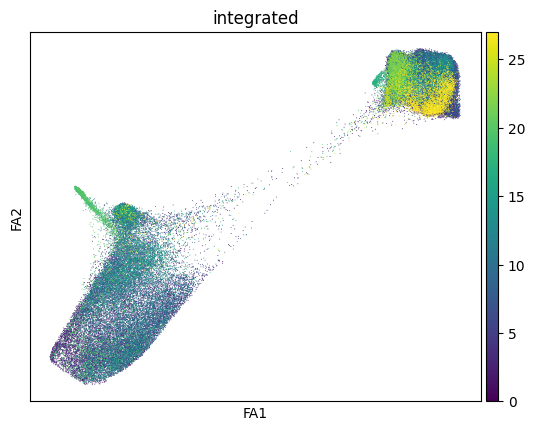

In [8]:
sc.pl.draw_graph(adata, color='integrated', legend_loc='on data')

In [9]:
sc.tl.diffmap(adata)

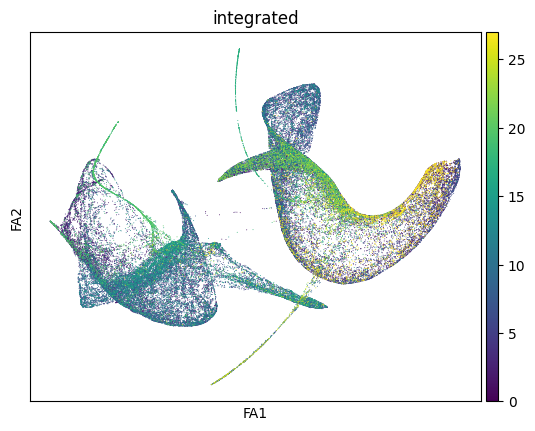

In [10]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_diffmap')
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color='integrated', legend_loc='on data')

In [11]:
# basic mode
scv.tl.velocity(adata)

computing velocities
    finished (0:00:10) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [12]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/10 cores)


  0%|          | 0/67208 [00:00<?, ?cells/s]

    finished (0:00:35) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [13]:
%pwd

'/Users/iwaseakiyasu/workspace/data/Multiome_Wnt1/Merge_Wnt1/v14/LogNormAll/1st/filtered/scvelo'

computing velocity embedding
    finished (0:00:05) --> added
    'velocity_umap.rpca', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_umap_velocity.png


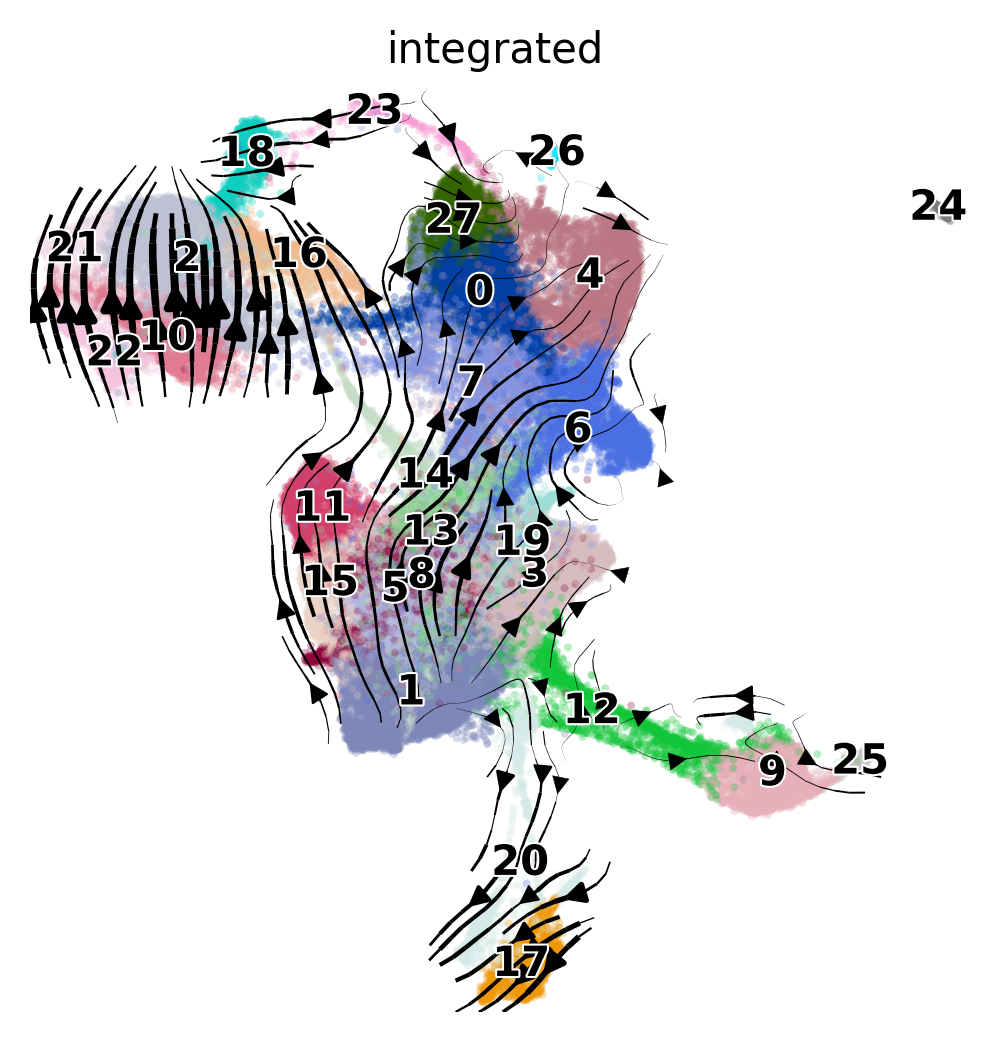

In [14]:
scv.pl.velocity_embedding_stream(adata, basis="umap.rpca", color="integrated", 
                                 save = "umap_velocity.png", dpi = 300, figsize=(4, 4))

In [15]:
# scv.pl.velocity_embedding(adata, basis="umap.rpca", color="seurat_clusters", arrow_length=3, arrow_size=2, dpi=300)